# Überwachtes Lernen 1

## Lernziele
* Konzepte aus dem Vorlesungsteil [überwachtes Lernen](https://janalasser.at/lectures/MC_KI/VO1_2_ueberwachtes_lernen/) anhand von Beispielen in Python nachvollziehen.
* Die "Naive Bayes" und "K nächste Nachbarn" Algorithmen aus dem Vorlesungsteil [Algorithmen für überwachtes Lernen](https://janalasser.at/lectures/MC_KI/VO1_3_algorithmen_ueberwachtes_lernen/) in Python anwenden können.

## Überwachtes Lernen mit scikit-learn

## Naive Bayes

In der [Vorlesung](https://janalasser.at/lectures/MC_KI/VO1_3_algorithmen_ueberwachtes_lernen/#/1/0/5) hatten wir das frequenzbasierte Raten (auch "Naive Bayes" Algorithmus genannt) als nützliche Baseline für Klassifizierungsalgorithmen kennen gelernt. Im Folgenden setzen wir das Beispiel aus der Vorlesung mit der Vorhersage der Qualität von Wein in Python um:

In [1]:
# importiere Pandas unter dem Kürzel "pd" um die Daten zu handhaben
import pandas as pd

# wir erstellen eine Tabelle mit Daten zur Qualität und Attributen von Wein
farben = ['rot','weiß','weiß','rot','weiß']
alter = ['alt', 'alt', 'jung', 'alt', 'jung']
qualitaet = ['gut', 'gut', 'gut', 'schlecht', 'schlecht']
daten_wein = pd.DataFrame({'farbe':farben, 'alter':alter, 'qualitaet':qualitaet})

# schließlich zeigen wir die Tabelle an
daten_wein

,farbe,alter,qualitaet
0,rot,alt,gut
1,weiß,alt,gut
2,weiß,jung,gut
3,rot,alt,schlecht
4,weiß,jung,schlecht


Mit diesen Daten können wir noch nicht arbeiten, da der Datensatz keine Zahlen sondern Strings enthält. Wie schon im [Vorlesungsteil zu Feature Engineering](https://janalasser.at/lectures/MC_KI/VO3_3_merkmalskonstruktion_dimensionsreduktion/#/1) müssen wir diese kategorischen Variablen erst in Zahlen umwandeln. Dies geschieht in `pandas` mit Hilfe der `map()` Funktion.  

Der `map()` Funktion übergeben wir ein Dictionary (siehe auch die Dokumentation zu Dictionaries in Python in [Kapitel 5.5](https://docs.python.org/3/tutorial/datastructures.html)), das jeden kategorischen Wert auf eine Zahl abbildet (Englisch: "to map").

In [2]:
# der Wert "rot" wird auf die Zahl 1 abgebildet, der Wert "weiß" auf 0
daten_wein['farbe'] = daten_wein['farbe'].map({'rot': 1, 'weiß': 0})

# der Wert "alt" wird auf die Zahl 1 abgebildet, der Wert "jung" auf 0
daten_wein['alter'] = daten_wein['alter'].map({'alt': 1, 'jung': 0})

# der wert "gut" wird auf die Zahl 1 abgebildet, der Wert "schlecht" auf 0
daten_wein['qualitaet'] = daten_wein['qualitaet'].map({"gut": 1, "schlecht": 0})

# so sieht die Tabelle bzw. das DataFrame jetzt aus:
daten_wein

,farbe,alter,qualitaet
0,1,1,1
1,0,1,1
2,0,0,1
3,1,1,0
4,0,0,0


Jede Beobachtung (also jeder Wein) wird durch eine **Zeile** in der Tabelle repräsentiert. Nun müssen wir uns noch darüber klar werden, was die **Attribute** und was die **Label** (oder auch Klassen, bzw. "Zielwerte") der Beobachtungen sind. Der [Nomenklatur aus der Vorlesung](https://janalasser.at/lectures/MC_KI/VO1_2_ueberwachtes_lernen/#/1/0/2) folgend weisen wir die Attribute einer (mehrdimensionalen!) Variablen mit dem Namen `x` zu und die label einer Variablen mit dem Wert `y`.

In [3]:
attribute = ["farbe", "alter"]
label = "qualitaet"

x = daten_wein[attribute]
y = daten_wein[label]

In [4]:
# so sieht die Variable "x" mit den Beobachtungen aus
x

,farbe,alter
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0


In [5]:
# und so die Variable "y" mit den labels bzw. Zielwerten
y

,qualitaet
0,1
1,1
2,1
3,0
4,0


Wir möchten nun einen Klassifikationsalgorithmus mit den existierenden Beobachtungen trainieren (siehe [Klassifizierungspipeline](https://janalasser.at/lectures/MC_KI/VO1_2_ueberwachtes_lernen/#/2/0/0)), um für eine neue Beobachtung die Qualität des Weines vorherzusagen.

Dafür verwenden wir die von `scikit-learn` zur verfügung gestellte Funktion `CategoricalNB`. Das steht für "Categorical Naive Bayes" (siehe auch Kapitel 1.9.5. der [Dokumentation](https://scikit-learn.org/1.5/modules/naive_bayes.html#gaussian-naive-bayes) von `scikit-learn` für die mathematischen Hintergründe bzw. die [Dokumentation](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) der Funktion selbst).

Es gibt in `scikit-learn` mehrere Versionen des Naive Bayes Algorithmus für Daten, die verschiedenen Verteilungen folgen. Da unsere Attribute allesamt kategorische Variablen sind, passt die `Categorical` Version für unseren Anwendungsfall.

In [7]:
# zuerst importieren wir das entsprechende Modul, das die Funktion
# CategoricalNB() bereitstellt
import sklearn.naive_bayes

# dann erstellen wir einen "leeren" Klassifikator, indem wir die
# Funktion aufrufen. An dieser Stelle könnten wir auch Parameter
# mitgeben, die das Verhalten des Klassifikators verändern. Die
# Default-Werte der Parameter sind für unseren Anwendungsfall aber
# ausreichend
naive_bayes_classifier = sklearn.naive_bayes.CategoricalNB()

# schlussendlich trainieren wir den Klassifikator mit den
# Beobachtungsdaten. Das wird im Englischen auch "fitten" genannt.
naive_bayes_classifier.fit(x, y)

CategoricalNB()

Nun wollen wir den trainierten Klassifikator anwenden, um für eine neue Beobachtung, von der wir nur die Attributswerte (also Farbe und Alter) kennen, die Qualität des Weins vorhersagen. Dafür erstellen wir uns erstmal eine weitere
Tabelle mit der neuen Beobachtung.  

**Hinweis**: wir erstellen hier zwar eine Tabelle mit nur einer einzigen Zeile, es spricht aber nichts dagegen, gleich mehrere neue Beobachtungen in der Tabelle zu speichern und auf einmal zu klassifizieren.

In [12]:
# von der neuen Beobachtung kennen wir nur die Attribute "farbe" und "alter" -
# nicht aber das label, also die Qualität.
farben = ['rot']
alter = ['jung']

# wir erstellen wieder ein DataFrame
neue_beobachtung = pd.DataFrame({'farbe':farben, 'alter':alter})
# und wandeln die kategorischen Daten in numerische um
neue_beobachtung['farbe'] = neue_beobachtung['farbe'].map({'rot': 1, 'weiß': 0})
neue_beobachtung['alter'] = neue_beobachtung['alter'].map({'alt': 1, 'jung': 0})

# so sieht die Tabelle mit der neuen Beobachtung jetzt aus
neue_beobachtung

,farbe,alter
0,1,0


Um die Qualität des neuen Weins vorherzusagen, vernwenden wir die vom trainierten Klassifikator bereitgestellte `predict()`-Funktion, die als Argument die neue Beobachtung nimmt und die Vorhersage des Zielwerts ausgibt.

In [13]:
naive_bayes_classifier.predict(neue_beobachtung)

array([0])

<font color='blue'><b>Übung überwachtes Lernen - 1</b></font>  
<font color='blue'>Machen Sie sich mit dem Verhalten des Naive Bayes Klassifikators vertraut:</font>
<ul class="outside">
<li><font color='blue'>Verändern Sie die Farbe des neuen Weins zu "weiß". Welche Vorhersage bekommen Sie jetzt für die Qualität des Weins?</font></li>
<li><font color='blue'>Was für eine Qualität wird für einen weißen Wein vorhergesagt, der "alt" ist, bzw. für einen roten wein, der "jung" ist?</font></li>
<li><font color='blue'>Fügen Sie der Tabelle mit den neuen Beobachtungen ein paar weitere Beobachtungen hinzu. Sie können dafür einfach in den jeweiligen listen `farben = []` sowie `alter = []` weitere Werte einfügen. Sagen Sie die Qualität für alle neuen Beobachtungen voraus.</font></li>
</ul>




## K nächste Nachbarn
Ein weiterer Algorithmus zur Klassifizierung, den wir in der [Vorlesung](https://janalasser.at/lectures/MC_KI/VO1_3_algorithmen_ueberwachtes_lernen/#/2/0/9) kennen gelernt haben, ist der K nächste Nachbarn Algorithmus. Er verwendet die Klassen der umliegenden Nachbarn, um die Klasse eines Datenpunktes vorherzusagen.

Im Folgenden implementieren wir K nächste Nachbarn Klassifizierung mit dem Titanic-Datensatz aus dem [vorangegangenen Kursteil](https://colab.research.google.com/drive/1Foi5obpE0y7MfwoEdgzFNDjXZDegJ6Vq#scrollTo=yT0TeegbsaiQ). Wir interessieren uns dabei dafür vorherzusagen, welche Passagier:innen überlebt haben.

In [14]:
# als ersten Schritt importieren wir den Datensatz wie vorhin
import seaborn as sns
daten_titanic = sns.load_dataset("titanic")
daten_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# wir interessieren uns erstmal aber nur für drei Spalten des Datensatzes:
# ob ein:e Passagier:in überlebt hat, das Alter, sowie den Preis des Tickets
interessante_spalten = ["age", "fare", "survived"]

# wir filtern die interessanten Spalten heraus
daten_titanic_gefiltert = daten_titanic[interessante_spalten]
daten_titanic_gefiltert

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [16]:
# wir stellen fest, dass dieser Datensatz noch "NaN"-Werte enthält. Damit hat
# der K nächste Nachbarn Algorithmus ein Problem. Wir entfernen also zuerst
# alle Beobachtungen (Passagier:innen), für die einer der Werte in der Tabelle
# "NaN" ist mit der dropna()-Funktion und machen eine Kopie des Datensatzes
# mit der copy()-Funktion.
daten_titanic_gefiltert = daten_titanic_gefiltert.dropna().copy()
daten_titanic_gefiltert

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,1
889,26.0,30.0000,1


<Axes: xlabel='age', ylabel='fare'>

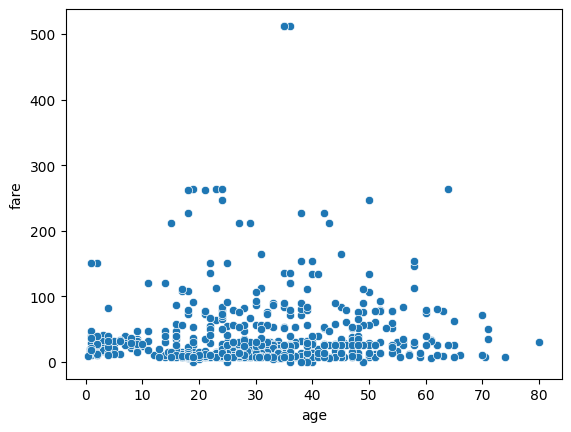

In [17]:
# zur Erinnerung: so sieht die Verteilung von Alter und Ticketpreis in dem
# Datensatz aus
import seaborn as sns
sns.scatterplot(data=daten_titanic_gefiltert, x="age", y="fare")

In [18]:
# wir legen wieder fest, welche Spalten die Attribute enthalten, und welche
# Spalte das label bzw. den Zielwert, den wir vorhersagen möchten
attribute = ["age", "fare"]
label = "survived"

x = daten_titanic_gefiltert[attribute]
y = daten_titanic_gefiltert[label]

In [34]:
# wieder bietet scikit-learn eine vorgefertigte Funktion, die den K nächste
# Nachbarn Algorithmus implementiert, die wir verwenden können, nachdem
# wir das entsprechende Modul importiert haben
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=35)

In [35]:
# wir trainieren den Klassifikator mit den Beobachtungen
knn_classifier.fit(x, y)

# und sagen dann (für die existierenden Beobachtungvorhersagen = knn_classifier.predict(x)en!) voraus, ob die
# betreffenden Passagier:innen überlebt haben
vorhersagen = knn_classifier.predict(x)

In [36]:
# um die Vorhersagen einfach mit den tatsächlichen Informationen zum Überleben
# der Passagier:innen vergleichen zu können, fügen wir Sie der Tabelle hinzu
daten_titanic_gefiltert["vorhersage"] = vorhersagen
daten_titanic_gefiltert.head()

<ipython-input-36-ef47e369586c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daten_titanic_gefiltert["vorhersage"] = vorhersagen


,age,fare,survived,vorhersage
0,22.0,7.2500,0,0
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


<Axes: xlabel='age', ylabel='fare'>

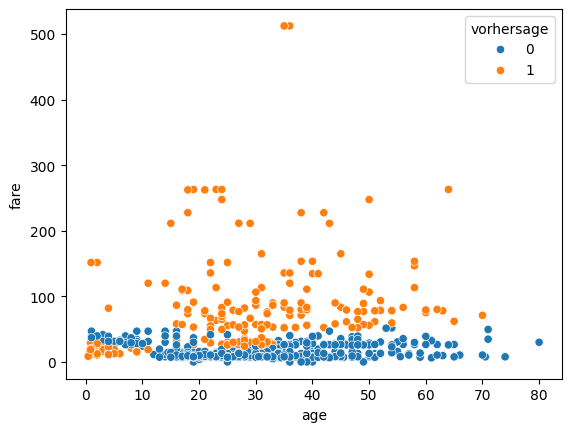

In [37]:
# außerdem können wir uns graphisch ansehen, für welche Beobachtungen unser
# Algorithmus "Überleben" (orange) bzw. "nicht überleben" (blau) vorhersagt,
# indem wir das "hue" Argument der scatterplot()-Funktion nutzen.
sns.scatterplot(data=daten_titanic_gefiltert, x="age", y="fare", hue="vorhersage")

<font color='blue'><b>Übung überwachtes Lernen - 2</b></font>  
<font color='blue'>Machen Sie sich mit dem Verhalten des K nächste Nachbarn Klassifikators vertraut.</font>
<ul class="outside">
<li><font color='blue'>Der Parameter <tt>n_neighbors</tt> legt fest, wie viele Nachbarn in die Klassifikation eingebunden werden. Was ist der Default Wert der Funktion, den wir im Beispiel vorhin verwendet haben?<br><b>Hinweis</b>: Die Dokumentation der Funktion finden Sie <a href="https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)">online</a>.</font></li>
<li><font color='blue'>Setzen Sie den Wert für <tt>n_neighbors</tt> auf 3, 11 und 35. Verwenden Sie jeweils die <tt>scatterplot()</tt> Funktion wie oben, um die Vorhersagen zu visualisieren. Wie verändern sich die Vorhersagen, abhängig vom Wert von <tt>n_neighbors</tt>?<br><b>Hinweis</b>: dafür müssen Sie den Wert für <tt>n_neighbors</tt> in der Zelle Setzen, in der Sie den "leeren" Klassifikator generieren, also <tt> knn_classifier = KNeighborsClassifier()</tt>. </font></li>
</ul>
<font color='blue'></font>




## Hausaufgaben

Die Hausaufgaben für diesen Kursteil finden sich in [diesem Notebook](https://colab.research.google.com/drive/1urZXFM8pWhW9MV6J8ssuVSFAEcYK8eju?usp=sharing).

## Weiterführende Materialien
* **scikit-learn**: [Dokumentation](https://scikit-learn.org/1.4/tutorial/basic/tutorial.html) Einführung in die Grundbegriffe und Nomenklatur von maschinellem Lernen mit `scikit-learn`.
* **scikit-learn**: [YouTube tutorial](https://www.youtube.com/watch?v=0B5eIE_1vpU) ein Crash-Kurs in machine learning mit scikit-learn.
* **machine learning**: [Buch](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413?shipTo=AT&source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A3JWKAKR8XB7XF&language=de_DE&gQT=1) Introduction to Machine Learning with Python: A Guide for Data Scientists mit umfassenden [Beispielen und Übungen](https://github.com/amueller/introduction_to_ml_with_python) in Python.

## Quelle und Lizenz

Das vorliegende Notebook wurde von Jana Lasser für den Kurs B "technische Aspekte" des Microcredentials "KI und Gesellschaft" der Universität Graz erstellt.

Das Notebook kann unter den Bedingungen der Lizenz [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0) verwendet, modifiziert und weiterverbreitet werden.
